# Case study- insurance


**Using the Concepts of Descriptive and Inferential Statistics learnt so far , to perform a Descriptive Analysis of a Axis Insurance Dataset and Produce a Managers Report containing the following steps.**
1. Load and View the Insurance File
2. Perform a Sanity check of the dataset. Look for missing values, corrupt values
3. Get descriptive statistics of each variable of the dataset 
4. Perform suitable visulaizations of each variable. Comment on center, spread and shape of each    distributuion.
5. Look at bivariate relationships using Scatterplot and correlation plots and extract insights from the data
6. Using descriptive statistics formulate hypothesis for each of the following scenarios
    - Claim charges made by smoking status
    - BMI scores by gender
    - smoker porortions by region
    - BMI scores by child status
7. Perform hypothesis testing to test the following claims
    - Are claims made by the people who smoke greater than those who don't?
    - Is BMI of females different from that of males? Use the cofidence interval method to confirm this.
    - Is the proportion of smokers different across different regions?
    - Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

### Step 0: Import the needed libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random
import statistics
from statsmodels.stats import weightstats as stests
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
print("All libraries are loaded")

All libraries are loaded


### Step1: Load and View the dataset

In [33]:
insurance=pd.read_csv('insurance.csv')

In [34]:
# view the first 5 rows of the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
# get the column names
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [36]:
# get more information on the data and data types
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observations**
1. Insurance dataset has 1338 rows and 7 columns
2. The 7 colums are :
   - age : age of the insuree
   - sex : gender of the insuree
   - bmi : bmi of the insuree
   - children: number of children of the insuree
   - smoker: whether the insuree is a smoker or not
   - region- the region insurer belongs to
   - charges- charges made by insurer
2. age, bmi , children and charges are numerical variables
3. sex, smoker and region are categorical variables

### Step 2:Perform Sanity Check on the data

In [37]:
# Check for null vaues
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [38]:
# Check for non-real corrupt characters
insurance[~insurance.apply(np.isreal).any(1)]

,age,sex,bmi,children,smoker,region,charges


In [39]:
# lets get the desctiptives of numerical variables
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Observations**
1. There are no null values in the dataset
2. There are no nonsensical values in age, bmi, children and charges
3. The maximum and minimum values of any numerical variables do not appear to be out of bounds or infeasible. 

### Step3: Descriptive statistics

In [40]:
# descrtiptives of numerical variables
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [41]:
# descriptives of catergorical variables
insurance.describe(include='O'). T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [42]:
# get the levels of the categorical variables
print(insurance.sex.unique(), insurance.smoker.unique(), insurance.region.unique())

['female' 'male'] ['yes' 'no'] ['southwest' 'southeast' 'northwest' 'northeast']


**Observations**
1. The mean &plusmn; sd of the age is  39 &plusmn; 14 years
2. The mean &plusmn; sd of BMI is 30 &plusmn; 6
3. The mean number of children is 1 with a maximum of 5
4. The mean &plusmn; sd of charges is \$ 13270 &plusmn;12110 
3. Gender distribution is about equal
4. Majority of the insurees are non-smokers (80%)
5. Most of the insurees are from southeast

### Step4: Visualizations

**Visualizations of numerical variable**

In [43]:
# define a function to draw boxplots and histplots on the same axis
def boxplot_histplot(data, feature):
    print("Boxplot and Histplot for {}".format(feature))
    fig, (ax_box, ax_hist)=plt.subplots(
    sharex=True,
    nrows=2,
    gridspec_kw={"height_ratios":(0.25, 0.75)})
    
    sns.boxplot(data=data, x=feature, color='violet', showmeans=True, ax=ax_box)
    sns.histplot(data=data, x=feature, ax=ax_hist)
    
    plt.axvline(data[feature].mean(), color='black', linestyle='--')
    plt.show()
    

Boxplot and Histplot for age


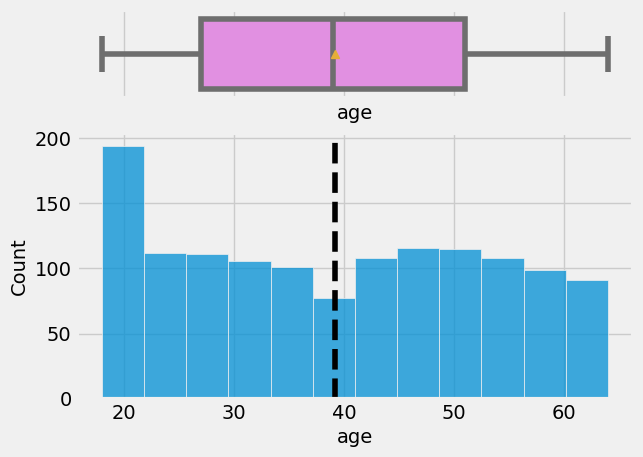

Boxplot and Histplot for bmi


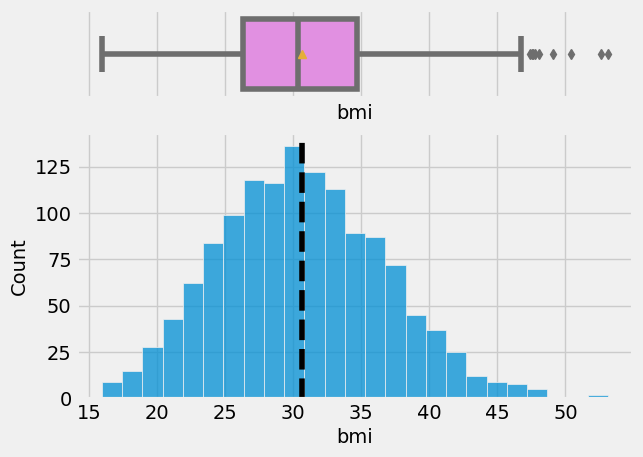

Boxplot and Histplot for children


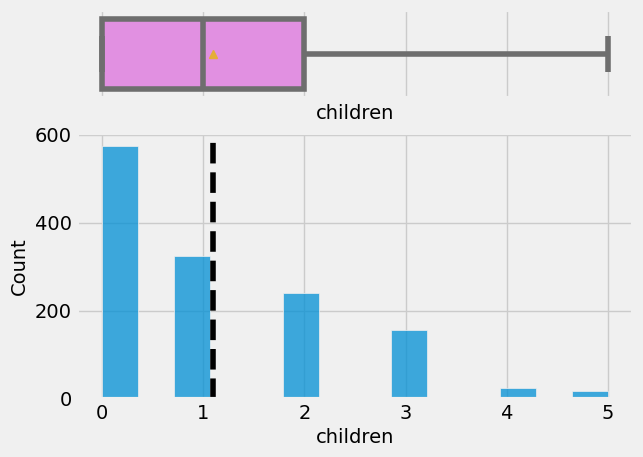

Boxplot and Histplot for charges


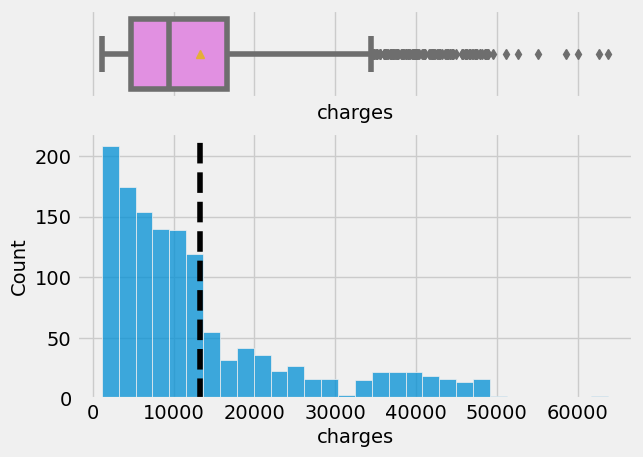

In [44]:
# create boxplots and histplots for each numerical variable
for col in  insurance.select_dtypes(exclude='O').columns:
    boxplot_histplot(data=insurance, feature=col)

**Observations**
1. Age is a roughly uniform distribution with mean age of 40
2. BMI is normal with an average BMI of 30
3. No of children is right skewed with average of 1 child and max of 5 chilren. However majority insurees have no children
4. Charges is highly right skewed with lots of outliers. It seems many of the insurees have overcharged the company

**Barplots for Categorical Variables**

In [45]:
# define a function to draw categorical barplots with percentage of bars
def plot_categorical(data, feature):
    plt.title("Countplot of {}".format(feature))
    ax=sns.countplot(data=data, x=feature)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:, 0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(insurance)), (x.mean(), y), ha='center', va='bottom')
    plt.show()        
        

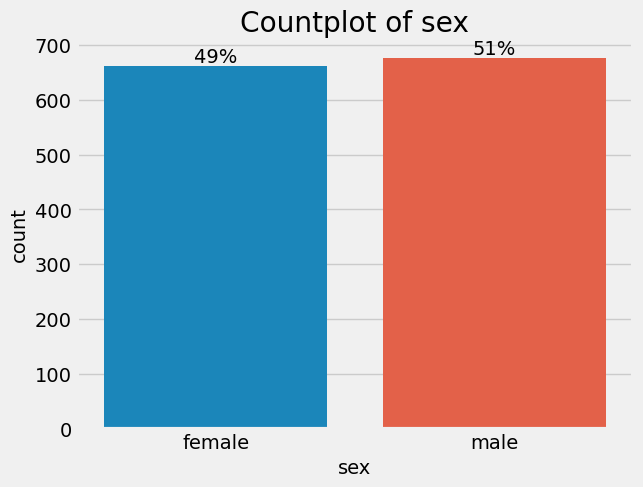

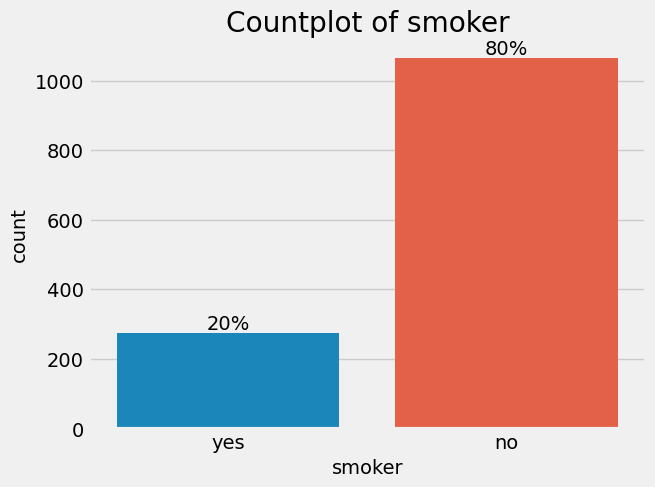

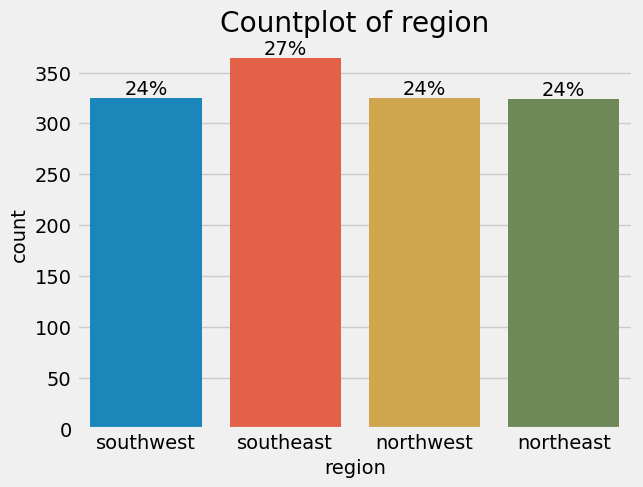

In [46]:
# create barplots for each categorical variable
for col in insurance.select_dtypes(include='O').columns:
    plot_categorical(data=insurance, feature=col)

**Observations**
1. Gender distribution is almost 1:1
2. 80% of the insurees are non-smokers, only 20% are smokers
3. Distribution of regions is about uniform with a slight majority from southeast region (27%)

### Step5: Bivariate Relationships using Scatterplots and Correlationplots


**Bivariate Countplots**

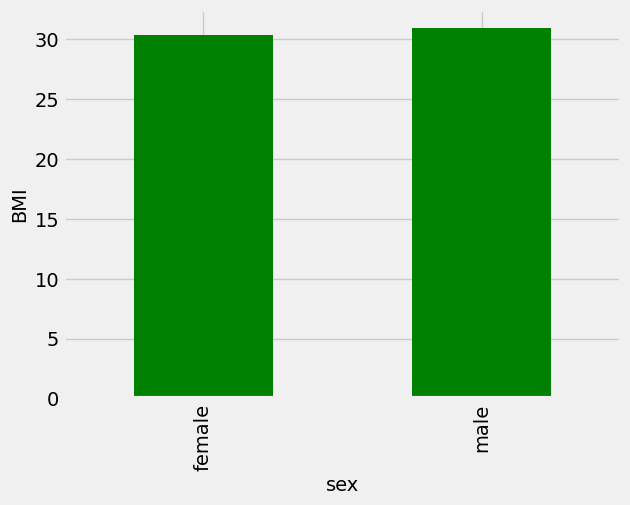

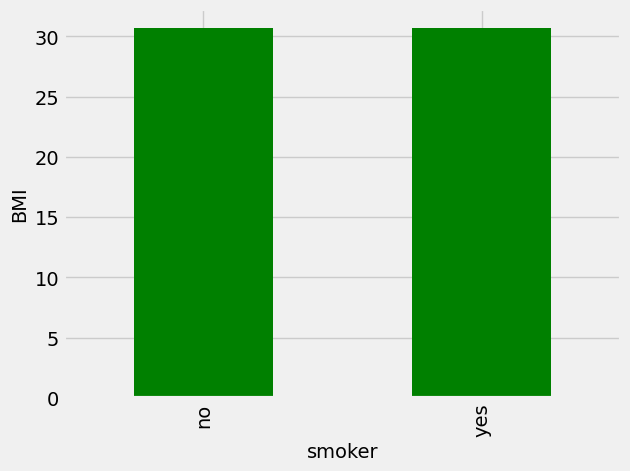

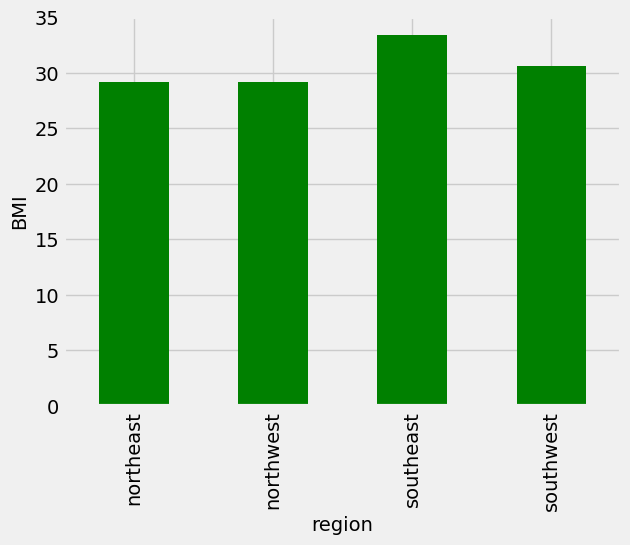

In [47]:
# draw bivariate coutplots and get meaningful observations
for col in insurance.select_dtypes(include='O').columns:
    insurance.groupby(col)['bmi'].mean().plot(kind='bar', color='green')
    plt.ylabel('BMI')
    plt.show()

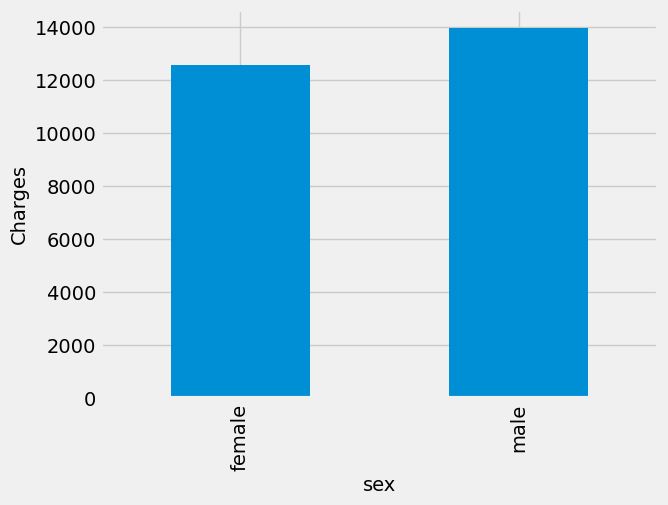

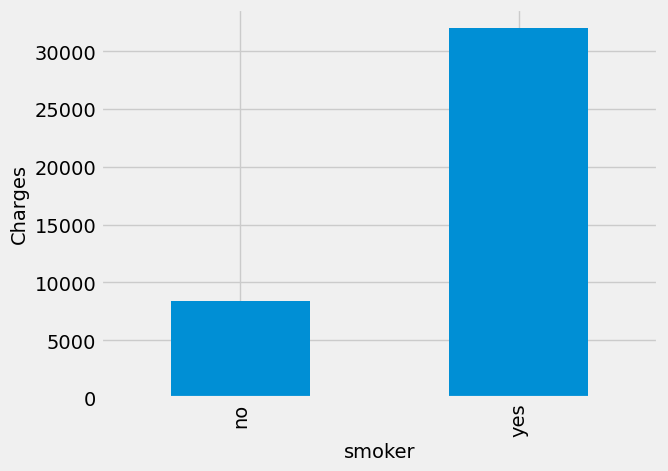

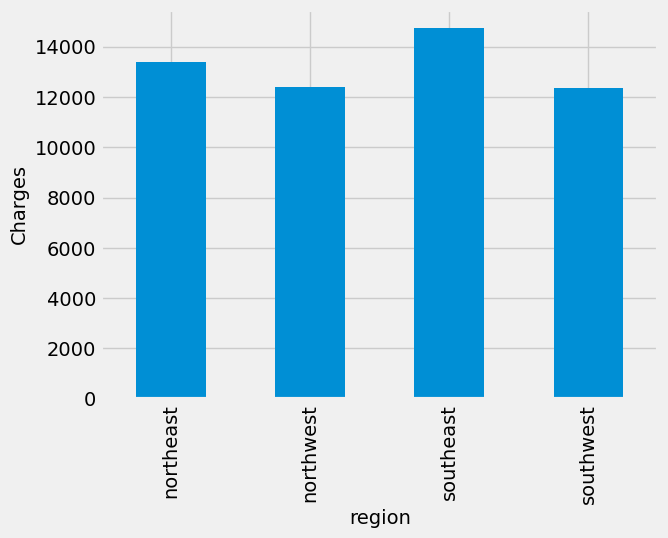

In [48]:
for col in insurance.select_dtypes(include='O').columns:
    insurance.groupby(col)['charges'].mean().plot(kind='bar')
    plt.ylabel('Charges')
    plt.show()

**Observations**
1. BMI distribution does not appear to be affected by gender, smoking status and region.
2. Smoking status being 'Yes' and Being male seem to be more correlated with higher charges.

**Get all possible scatterplots**

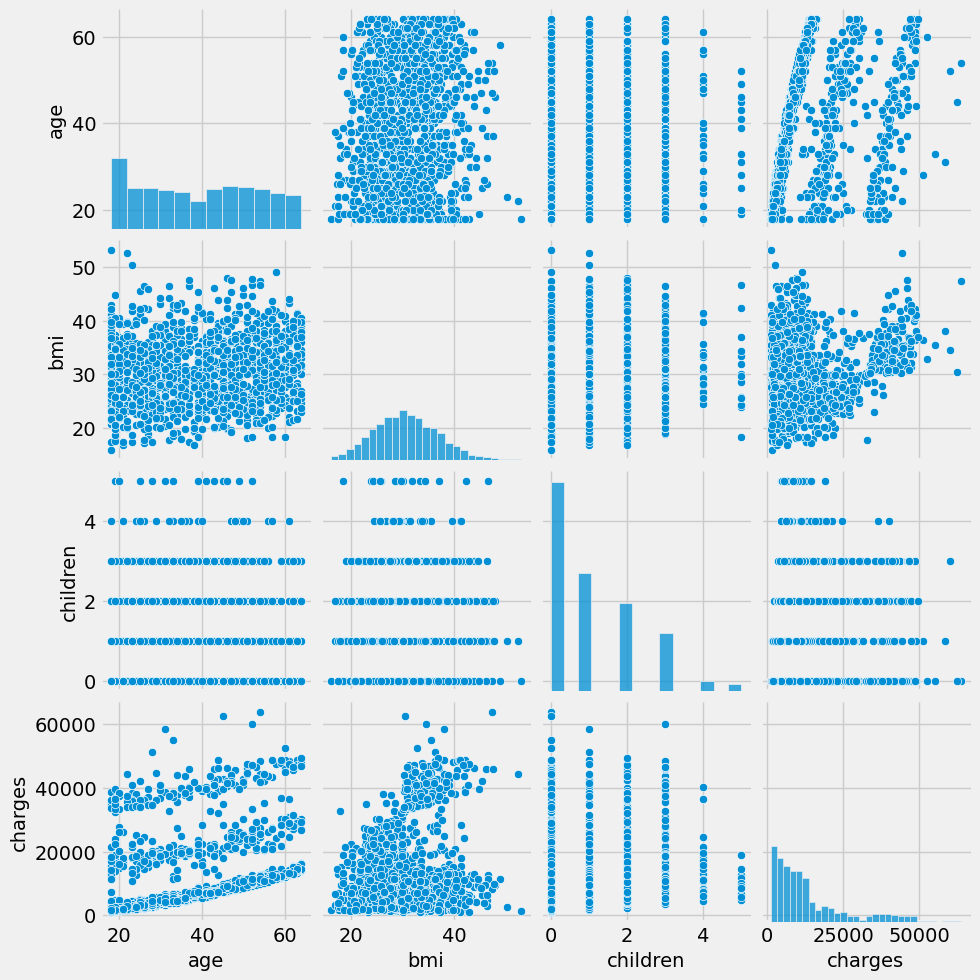

In [50]:
sns.pairplot(insurance)
plt.show()

**create a correlation heatmap**

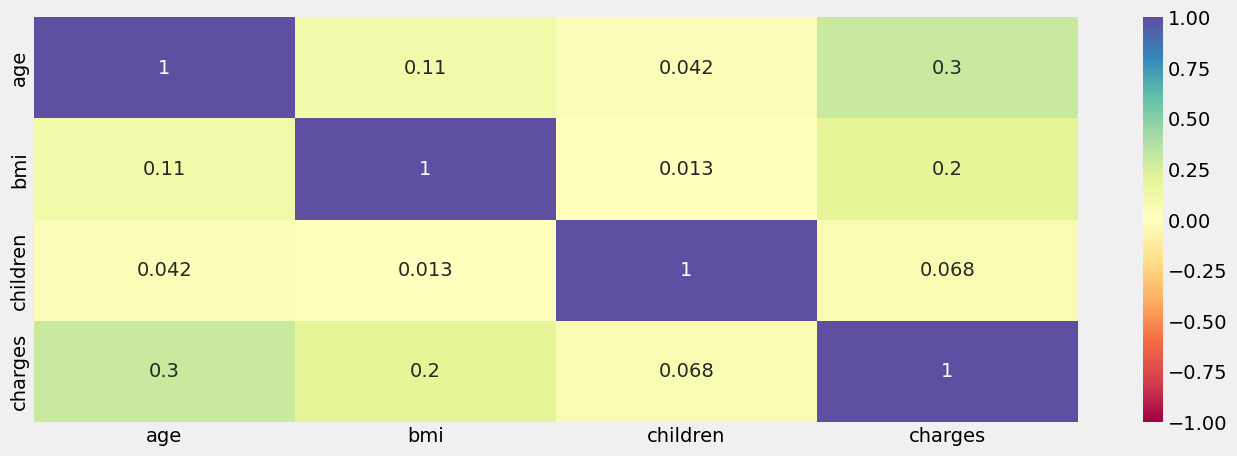

In [51]:
plt.figure(figsize=(15,5))
sns.heatmap(insurance.corr(), annot=True, cmap='Spectral', vmax=+1, vmin=-1)
plt.show()

**Observations**
1. Age is positively correlated with Charges ( r=0.3)
2. BMI is also have a mild positive correlation with Charges(r=0.2) 
2. Males on average are likely to file higher claims than females
3. On average smokers are likely to file much higher claim amounts than non smokers

### Step6: Using descriptive statistics observations formulate the hypotheses for each of the following issues  
    - Claim charges  by smoking status
    - BMI scores by gender
    - Smoker porortions by region
    - BMI scores by child status

**1.Claim charges by smoking status?**

In [58]:
insurance.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

<Axes: xlabel='smoker'>

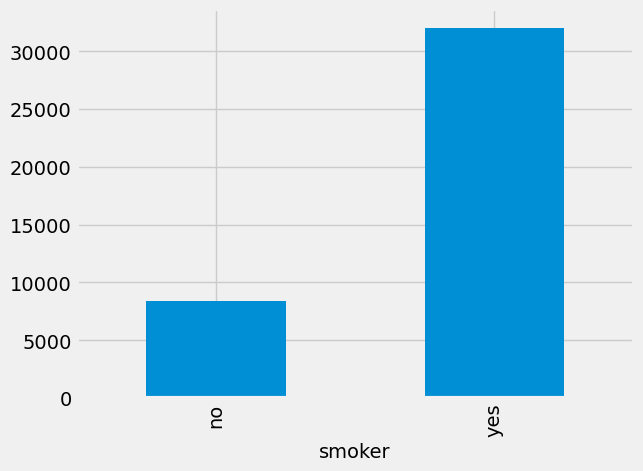

In [59]:
insurance.groupby('smoker')['charges'].mean().plot(kind='bar')

- Yes , Smokers definitely appear to claim higher amounts on average than non smokers
- Hypothesis Claim:Smokers charge more than non-smokers ?

**2. BMI scores by gender**

In [60]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [61]:
insurance.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

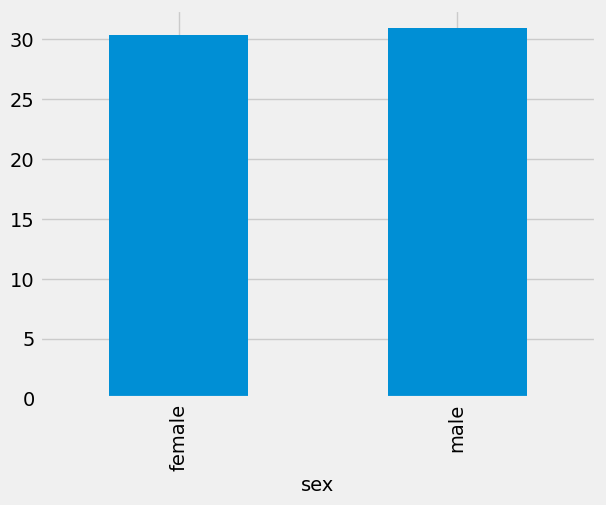

In [62]:
insurance.groupby('sex')['bmi'].mean().plot(kind='bar')
plt.show()

- BMIs of males and females are on average do not appear to be different among the insurees
- Hypothesis: Is BMI of females similar to that of males?

**3. Smoker porortions by region?**

In [63]:
one=pd.crosstab(insurance['region'], insurance['smoker'])
two=pd.crosstab(insurance['region'], insurance['smoker'], normalize=True)
two

smoker,no,yes
region,,
northeast,0.192078,0.050075
northwest,0.199552,0.043348
southeast,0.204036,0.068012
southwest,0.199552,0.043348


- Proprtion of smokers in southwest appear to be higher than other regions
- Hypothesis- Is the proportion of smokers of at least one regions different from the rest  ?

**4) BMI scores by child status**

In [66]:
insurance.groupby('children')['bmi'].mean()

children
0    30.550296
1    30.623148
2    30.978104
3    30.684331
4    31.391200
5    29.605000
Name: bmi, dtype: float64

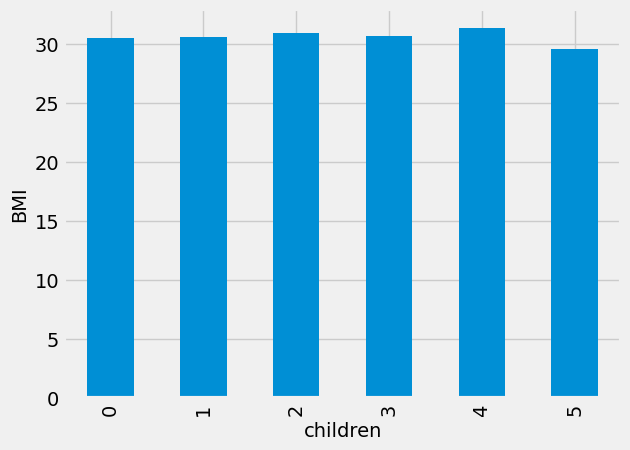

In [67]:
insurance.groupby('children')['bmi'].mean().plot(kind='bar')
plt.ylabel('BMI')
plt.show()

- Distribution of BMI appears to be similar in women across all children groups
- Hypothesis: **Are the mean BMI of women with no children, one child and two children the same? **

**Important** 
Even if differences are seen across various groups in the descriptive analysis phase we have to perform statistical test to conform these differences

### Q7)  Perform hypothesis testing to test the following claims
- Are charges made by the people who smoke higher than those who don't?
- Is BMI of females similar to that of males?
- Is the proportion of smokers in at least one region different from the rest?
- Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

**1. Are charges made by the people who smoke greater than those who don't?**

In [70]:
# Step1: Hypothesis H0: mu1 <=mu2   vs H1: mu1 > mu2 (claim)
# First we get the two samples of data of smokers and non smokers
smoke=insurance[insurance['smoker']=='yes']
non=insurance[insurance['smoker']=='no']
samp1=smoke.sample(n=100,random_state=21)['charges']
samp2=non.sample(n=100, random_state=21)['charges']
n1=len(samp1)
n2=len(samp2)
print(n1, n2)
print("Sample Means :", samp1.mean(), samp2.mean())
# We can use an independent samples  t  test since using
# the sample standard deviations 

#Step2: check the assumption of equality of variances
f, pval=stats.levene(samp1, samp2)
print("Levene's Test p-value=", pval, 'Hence the variances are unequal')

# step3 : get the critical values 
alpha =0.05
cv=stats.t.isf(0.05/2, df=n1-1)
print('Critical Value =',cv)

# step4: get test val and pval
from statsmodels.stats import weightstats as stests
stat,pval=stats.ttest_ind(samp1, samp2, alternative='greater', equal_var=False)
print("Test value = ", stat,"P-value =" ,pval)

# Step5: Conclusion
# Since test value > Critical Value and pval << 0.05  
print("Here  P-value <<0.05 and test value >> Critical value")
print("Decision: Reject H0 ")
print("There is enough evidence to conclude that \
Smokers on average charge more than non smokers")




100 100
Sample Means : 31405.071776 8649.9775583
Levene's Test p-value= 1.2258500415301915e-13 Hence the variances are unequal
Critical Value = 1.9842169515086832
Test value =  18.048558174067704 P-value = 3.81083657295165e-40
Here  P-value <<0.05 and test value >> Critical value
Decision: Reject H0 
There is enough evidence to conclude that Smokers on average charge more than non smokers


**2. Is BMI of females  different from that of males?**

In [79]:
# Step1: Set the Hypothesis
# H0: mu1 = mu2(claim)    H1: mu1 <> mu2 

# Step2: Make the sample groups
samp1=insurance[insurance['sex']=='male']['bmi']
samp2=insurance[insurance['sex']=='female']['bmi']
n1=len(samp1)
n2=len(samp2)
x1_bar=np.mean(samp1)
x2_bar=np.mean(samp2)
s1=statistics.stdev(samp1)
s2=statistics.stdev(samp2)
print(n1, n2)
print(x1_bar, x2_bar)
print(s1, s2)
# here we have samples of size >30 so we will use a 2-sample z test

# Step3 :Find the Critical Value
apha=0.05   # two sided hypothesis
CV =stats.norm.isf(alpha/2)
print("Critical Value= ", CV)

# Step4 : Find z-test value and p-value
stat, pval=stests.ztest(samp1, samp2, value=0)
print("Test Value =", stat, " P-value=", pval)

#get the 95% confidence interval
conf_int=stats.norm.interval(0.95, loc=x1_bar-x2_bar,
                            scale=np.sqrt((s1**2)/n1 + (s2**2)/n2))
print("95% CI =", np.round(conf_int, 2))

# Step5: Decision and Conclusion
print("Observation: Test Value is in Non critical Region and Pvalue> 0.05. \
Also the 95% Confidence Interval for the mean difference contains 0")
print("Decision: Do not reject H0")
print("Conclusion: There is not enough evicence to reject the claim \
that the two sample means are similar")

676 662
30.943128698224854 30.37774924471299
6.140434615792243 6.046023085745335
Critical Value=  1.9599639845400545
Test Value = 1.6967526357522242  P-value= 0.08974343679943912
95% CI = [-0.09  1.22]
Observation: Test Value is in Non critical Region and Pvalue> 0.05. Also the 95% Confidence Interval for the mean difference contains 0
Decision: Do not reject H0
Conclusion: There is not enough evicence to reject the claim that the two sample means are similar


**3. Is the proportion of smokers  different across different regions?**

In [81]:
# There are 4 regions and we have to perform a homogeniety of proportions test 
# we can use the Chi Square Test to test this hypothesis

# Step1: State the hypothesis
# H0:All regions have equal proportions of smokers
# H1: There is at least 1 region where proportion of smokers is different (claim)
# this is a right sided hypothesis 

# Step2 : create the cross table table and the table of observed values
table=pd.crosstab(insurance['region'], insurance['smoker'])
observed_value=table.values
print(table)

# Step3: Get the Critical value
from scipy.stats import chi2
alpha=0.05
cv=chi2.isf(alpha, df=(4-1)*(2-1))
print("Critical Value =", cv)

# Step4: Run the Chi square test for the homogeniety of proportions
chi2, p, dof, expected=chi2_contingency(observed=observed_value, correction=False)
print("test value =", chi2,"P-value =",  p)

# Step5: Decision and conclusion
print("Test value lies in Non-critical regions and P-value >0.05")
print("Decision: Do Not reject H0")
print("There is not enough evidence to conclude that the proportion of \
smokers in different regions are different")

smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58
Critical Value = 7.814727903251178
test value = 7.343477761407071 P-value = 0.06171954839170541
Test value lies in Non-critical regions and P-value >0.05
Decision: Do Not reject H0
There is not enough evidence to conclude that the proportion of smokers in different regions are different


**Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.**

In [82]:
# change the children to object datatype
insurance['children']=insurance['children'].astype("object")

# check value types of each level of the number of children
insurance['children'].value_counts()

# make the subgroups of the data with 0, 1, 2 children
grp0=insurance[insurance['children']==0]['bmi']
grp1=insurance[insurance['children']==1]['bmi']
grp2=insurance[insurance['children']==2]['bmi']
# plot the subgropup plots
print(insurance.groupby('children')['bmi'].mean())

# Hypothesis
# H0: the three group means are the same(claim)
# H0: at least 1 group mean is different

# perform a one_way ANOVA for the 3 group mean bmi's
stat, pval=stats.f_oneway(grp0, grp1, grp2)
print(stat, pval)

# Decision and Conclusion 
print("Decision: Do not reject H0")
print("Conclusion: All the 3 group means are the same as we do not \
have enough evidence to reject the claim")

children
0    30.550296
1    30.623148
2    30.978104
3    30.684331
4    31.391200
5    29.605000
Name: bmi, dtype: float64
0.4169829280345703 0.6591330886467935
Decision: Do not reject H0
Conclusion: All the 3 group means are the same as we do not have enough evidence to reject the claim


# END